In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x - cos(x) -1
    
def d_f(x, h):
    return (f(x+h)-f(x))/h

def newton_raphson(x_i):
    x_ii = x_i - f(x_i)/d_f(x_i, 0.1)
    
    if abs(x_ii - x_i) < 10**(-5) : 
        print(x_ii)
    else : 
        return newton_raphson(x_ii)

def f2(x, y) :
    return sin(x)
    
def euler(n, x0, y0, h):
    x = np.zeros(n)
    y = np.zeros(n)

    x[0] = x0
    y[0] = y0

    for i in range(len(x)-1):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h*f2(x[i], y[i])

    plt.plot(x,y)
    plt.grid()

def Jacobi(A, b, x_i):
    max_iterations = 100
    x_ii = np.zeros_like(x_i) 
    for k in range(0, max_iterations):
        for i in range(0, len(b)):
            s = 0
            for j in range(0, len(b)):
                if j != i: 
                    s = s + A[i, j] * x_i[j]
            x_ii[i] = (b[i] - s) / A[i, i]
       
        if abs(np.linalg.norm(x_i - x_ii)) < 1e-5:
            break
        else:
            x_i = x_ii
            
    return x_ii
 
def Gauss_Seidel(A, b, x_i):
    max_iterations = 100
    for k in range(0, max_iterations):
        d = x_i.copy()
        for i in range(0, len(b)):
            s = 0
            for j in range(0, len(b)):
                if i != j: 
                    s = s + A[i, j] * x_i[j]
            x_i[i] = (b[i] - s) / A[i, i]
        
        if abs(np.linalg.norm(x_i - d)) < 1e-5: 
            break
            
    return x_i

In [2]:
newton_raphson(1)

0.6071016722399549


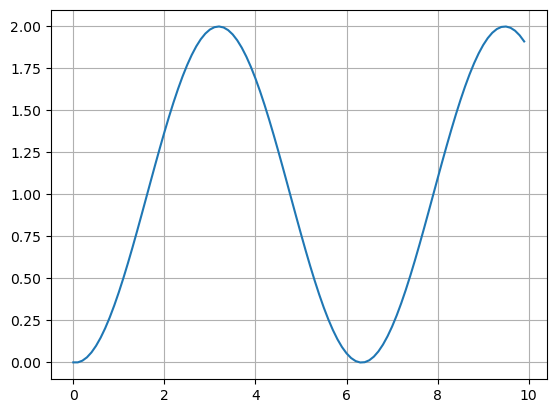

In [3]:
euler(100, 0, 0, 0.1)

In [4]:
A = np.array([[4.0, -1.0, -1.0],
              [-2.0, 6.0, 1.0],
              [-1.0, 1.0, 7.0]])

b = np.array([3.0, 9.0, -6.0])

x0 = np.array([0.0, 0.0, 0.0])

print(Jacobi(A, b, x0))

print(Gauss_Seidel(A, b, x0))

[ 0.91071429  1.94642857 -1.00510204]
[ 1.0000001   2.00000006 -0.99999999]
